#EE-411, HomeWork 2 : Classifying digits & learning theory

EPFL, Autumn 2022

Culha Defne - SCIPER 353020

##1 Classifying digits with Scikit-learn


###1.1 Import and prepare the data:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Import the dataset
from sklearn.datasets import load_digits
digits = load_digits() #ndarray w shape (1797, 64)

X_raw, y_raw = load_digits(return_X_y = True) #X = 1797 x 64, y = 1797 x 1

In [ ]:
# The images are automatically imported as vectors xi,(i = 1,...,n), 
# but so far the labels are numbers between 0 and 9. 
# Change the targets yi to correspond to 0/1 for even and odd numbers respectively.

y_bin = []
for yi in y_raw:
  y_bin.append(yi%2)

from collections import Counter
Counter(y_bin)


Counter({0: 891, 1: 906})

In [ ]:
# Split the data into a “training” & a “testing” set (using roughly 60% and 40% ).

from sklearn.model_selection import train_test_split

i = range(0,len(y_raw))
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X_raw,y_bin, i , test_size = 0.4, random_state = 1)



In [ ]:
print('train set: ', len(y_train), '// test set: ', len(y_test))
percentage = 100*len(y_train)/ (len(y_train)+len(y_test))
print ('train set / total = %', percentage)
print ('test set / total = %', 100-percentage)

train set:  1078 // test set:  719
train set / total = % 59.98887033945465
test set / total = % 40.01112966054535


In [ ]:
y_raw_max = y_raw.max()
print('y_raw max = ', y_raw_max)
y_raw_min = y_raw.min()
print('y_raw min = ', y_raw_min)

y_raw max =  9
y_raw min =  0


In [ ]:
# Check that these two subsets have roughly the same proportion of labelled numbers.

count_train = []
for value in range (y_raw_min, y_raw_max+1):
  count = 0
  for i in i_train:
    if (y_raw[i] ==value):
      count=count+1
  count_train.append(count)


count_test = []
for value in range (y_raw_min, y_raw_max+1):
  count = 0
  for i in i_test:
    if (y_raw[i] ==value):
      count=count+1
  count_test.append(count)

for value in range (y_raw_min, y_raw_max+1):
  print('Number of', value)
  total = count_train[value] + count_test[value]
  percent_train = count_train[value]/total*100
  percent_test = count_test[value]/total*100
  print('in train set: ', count_train[value], 'making up %',percent_train)
  print('in test set: ', count_test[value], 'making up %', percent_test)
  print('')

Number of 0
in train set:  104 making up % 58.42696629213483
in test set:  74 making up % 41.57303370786517

Number of 1
in train set:  114 making up % 62.637362637362635
in test set:  68 making up % 37.362637362637365

Number of 2
in train set:  109 making up % 61.5819209039548
in test set:  68 making up % 38.4180790960452

Number of 3
in train set:  100 making up % 54.644808743169406
in test set:  83 making up % 45.3551912568306

Number of 4
in train set:  102 making up % 56.353591160220994
in test set:  79 making up % 43.646408839779006

Number of 5
in train set:  117 making up % 64.28571428571429
in test set:  65 making up % 35.714285714285715

Number of 6
in train set:  111 making up % 61.32596685082873
in test set:  70 making up % 38.67403314917127

Number of 7
in train set:  105 making up % 58.659217877094974
in test set:  74 making up % 41.340782122905026

Number of 8
in train set:  112 making up % 64.36781609195403
in test set:  62 making up % 35.63218390804598

Number of 9
in

###1.2 Logistic regression: 

In [ ]:
# Using linear model.LogisticRegression, train a classifier based on Logistic regression 
# to decide if an image represents an odd or an even digit, 
# comparing l2 and l1 penalty 
# (you can fix the penalty just by setting the corresponding parameter when you call LogisticRegression() to generate the method).

from sklearn.linear_model import LogisticRegression
import time


### FOR L1 penalty
print ('L1 Penalty')
t_1 = time.time()

# Apply logistic regressor, C is the inverse regularization strength
clf_1 = LogisticRegression(penalty='l1', solver='liblinear', C=1)

# fit data
clf_1.fit(X_train, y_train)

# percentage of nonzero weights
sparsity = np.mean(clf_1.coef_ == 0) * 100

# compute accuracy
score_1 = clf_1.score(X_test, y_test)

#display run time
run_time_1 = time.time() - t_1
print('Example run in %.3f s' % run_time_1)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score_1)
print('')

### FOR L2 penalty, repeat as before to compare
print ('L2 Penalty')
t_2 = time.time()


# Apply logistic regressor, C is the inverse regularization strength
clf_2 = LogisticRegression(penalty='l2', max_iter=10000, C=1)

# fit data
clf_2.fit(X_train, y_train)

# percentage of nonzero weights
sparsity_2 = np.mean(clf_2.coef_ == 0) * 100

# compute accuracy
score_2 = clf_2.score(X_test, y_test)

#display run time
run_time_2 = time.time() - t_2
print('Example run in %.3f s' % run_time_2)

print("Sparsity with L2 penalty: %.2f%%" % sparsity_2)
print("Test score with L2 penalty: %.4f" % score_2)


L1 Penalty
Example run in 0.058 s
Sparsity with L1 penalty: 21.88%
Test score with L1 penalty: 0.9277

L2 Penalty
Example run in 0.264 s
Sparsity with L2 penalty: 6.25%
Test score with L2 penalty: 0.9249


In [ ]:
# Using GridSearchCV with n splits=5, as seen during the exercise sessions, 
# perform cross validation to fix the optimal hyperparameters 
# (the regularization constant for the penalty) studying the interval 
# λ ∈ [10^−1,10^4] on a logarithmic scale. 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import LinearSVC

# creating a KFold object with 5 splits 
folds = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

# Specify range of hyperparameters
# Lambda is 1/C
tab_C = np.logspace(-4,1,30)
param_grid = [{'C': tab_C}]


# For L1

# set up GridSearchCV()
model_cv_1 = GridSearchCV(clf_1, 
                          param_grid = param_grid,
                          cv = folds,
                          return_train_score=True)      

# fit the model
model_cv_1.fit(X_train, y_train)

# For L2
# set up GridSearchCV()
model_cv_2 = GridSearchCV(clf_2, 
                          param_grid = param_grid,
                          cv = folds,
                          return_train_score=True)      

# fit the model
model_cv_2.fit(X_train, y_train)



GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             i...
       1.17210230e-02, 1.74332882e-02, 2.59294380e-02, 3.85662042e-02,
       5.73615251e-02, 8.53167852e-02, 1.26896100e-01, 1.88739182e-01,
       2.80721620e-01, 4.17531894e-01, 6.21016942e-01, 9.23670857e-01,
       1.37382380e+00, 2.04335972e+00, 3.03919538e+00, 4.52035366e+00,
       6.

In [ ]:
cv_1_results = pd.DataFrame(model_cv_1.cv_results_)
cv_1_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time      param_C  \
0       0.003554      0.001603         0.002215        0.002975       0.0001   
1       0.001994      0.000238         0.000582        0.000117  0.000148735   
2       0.002737      0.001074         0.000600        0.000114  0.000221222   
3       0.002203      0.000747         0.000578        0.000130  0.000329034   
4       0.002481      0.000992         0.000684        0.000191   0.00048939   

                          params  split0_test_score  split1_test_score  \
0                  {'C': 0.0001}           0.496296           0.474074   
1  {'C': 0.00014873521072935117}           0.496296           0.474074   
2    {'C': 0.000221221629107045}           0.496296           0.474074   
3  {'C': 0.00032903445623126676}           0.496296           0.474074   
4   {'C': 0.0004893900918477494}           0.496296           0.474074   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.444444           0.492593  ...         0.474074        0.019174   
1           0.444444           0.492593  ...         0.474074        0.019174   
2           0.444444           0.492593  ...         0.474074        0.019174   
3           0.444444           0.492593  ...         0.474074        0.019174   
4           0.444444           0.492593  ...         0.474074        0.019174   

   rank_test_score  split0_train_score  split1_train_score  \
0               25                 0.5            0.507426   
1               25                 0.5            0.507426   
2               25                 0.5            0.507426   
3               25                 0.5            0.507426   
4               25                 0.5            0.507426   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.517327            0.501238            0.511139   
1            0.517327            0.501238            0.511139   
2            0.517327            0.501238            0.511139   
3            0.517327            0.501238            0.511139   
4            0.517327            0.501238            0.511139   

   mean_train_score  std_train_score  
0          0.507426         0.006407  
1          0.507426         0.006407  
2          0.507426         0.006407  
3          0.507426         0.006407  
4          0.507426         0.006407  

[5 rows x 21 columns]

In [ ]:
cv_2_results = pd.DataFrame(model_cv_2.cv_results_)
cv_2_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time      param_C  \
0       0.012871      0.002108         0.000561        0.000091       0.0001   
1       0.012568      0.003631         0.000492        0.000010  0.000148735   
2       0.014946      0.002726         0.000503        0.000020  0.000221222   
3       0.015735      0.002909         0.000667        0.000237  0.000329034   
4       0.016398      0.001590         0.000520        0.000043   0.00048939   

                          params  split0_test_score  split1_test_score  \
0                  {'C': 0.0001}           0.877778           0.892593   
1  {'C': 0.00014873521072935117}           0.881481           0.907407   
2    {'C': 0.000221221629107045}           0.888889           0.911111   
3  {'C': 0.00032903445623126676}           0.885185           0.911111   
4   {'C': 0.0004893900918477494}           0.881481           0.914815   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.874074           0.896296  ...         0.888148        0.010317   
1           0.877778           0.907407  ...         0.895556        0.013126   
2           0.885185           0.907407  ...         0.898519        0.010102   
3           0.881481           0.914815  ...         0.898519        0.013374   
4           0.885185           0.922222  ...         0.902222        0.016161   

   rank_test_score  split0_train_score  split1_train_score  \
0               30            0.884901            0.886139   
1               29            0.900990            0.891089   
2               27            0.905941            0.896040   
3               27            0.907178            0.903465   
4               23            0.909653            0.904703   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.896040            0.886139            0.893564   
1            0.903465            0.891089            0.899752   
2            0.907178            0.899752            0.902228   
3            0.909653            0.899752            0.904703   
4            0.915842            0.900990            0.905941   

   mean_train_score  std_train_score  
0          0.889356         0.004537  
1          0.897277         0.005192  
2          0.902228         0.004067  
3          0.904950         0.003358  
4          0.907426         0.005036  

[5 rows x 21 columns]

In [ ]:
# Printing the optimal hyperparameters
best_C_L1 = (model_cv_1.best_params_)
print("The best test estimator for L1 corresponds to C {0}".format(best_C_L1))

best_C_L2 = model_cv_2.best_params_
print("The best test estimator for L2 corresponds to C {0}".format(best_C_L2))

The best test estimator for L1 corresponds to C {'C': 0.18873918221350977}
The best test estimator for L2 corresponds to C {'C': 0.003562247890262444}


In [ ]:
# Printing the optimal accuracy score for test set and optimal hyperparameters
best_score_1_test = model_cv_1.best_estimator_.score(X_test,y_test)
best_score_2_test = model_cv_2.best_estimator_.score(X_test,y_test)

print("The best test score for L1 is {0} corresponding to C {1}".format(best_score_1_test, best_C_L1))
print("The best test score for L2 is {0} corresponding to C {1}".format(best_score_2_test, best_C_L2))

The best test score for L1 is 0.9221140472878998 corresponding to C {'C': 0.18873918221350977}
The best test score for L2 is 0.9235048678720446 corresponding to C {'C': 0.003562247890262444}


In [ ]:
# Therefore, lambda is 1/C 
best_lambda_L1 = 1/0.18873918221350977
best_lambda_L2 = 1/0.003562247890262444

In [ ]:
y_pred_l1 = model_cv_1.predict(X_test)
score_l1 = model_cv_1.score(X_test,y_test)
y_pred_l2 = model_cv_2.predict(X_test)
score_l2 = model_cv_2.score(X_test,y_test)
print('Score L1:', score_l1)
print('Score L2:', score_l2)

Score L1: 0.9221140472878998
Score L2: 0.9235048678720446


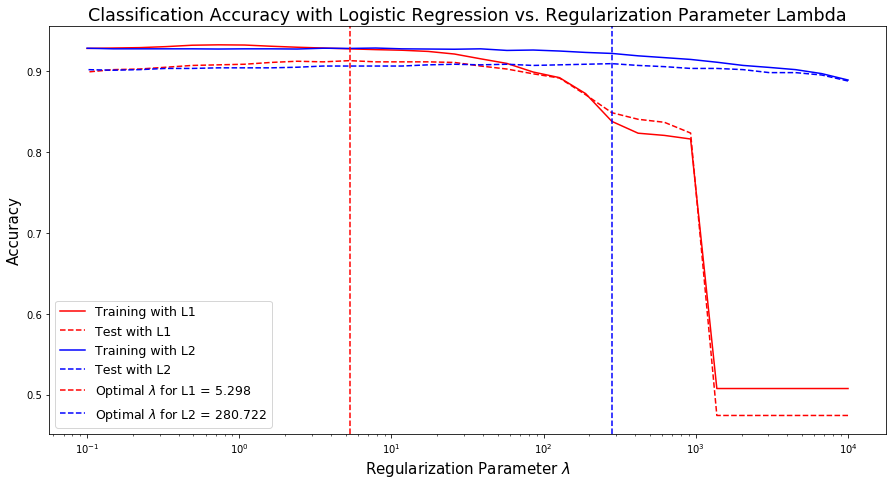

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7.5))

tab_lambda_L = []
for i in tab_C:
  tab_lambda_L.append(1/i)

plt.title('Classification Accuracy with Logistic Regression vs. Regularization Parameter Lambda', fontsize=17.5)
plt.plot(tab_lambda_L, model_cv_1.cv_results_['mean_train_score'], color='red',label='Training with L1' )
plt.plot(tab_lambda_L, model_cv_1.cv_results_['mean_test_score'] ,color='red',linestyle='--',label='Test with L1')
plt.plot(tab_lambda_L, model_cv_2.cv_results_['mean_train_score'] ,color='blue', label='Training with L2')
plt.plot(tab_lambda_L, model_cv_2.cv_results_['mean_test_score']   ,color='blue',linestyle='--',label='Test with L2')

plt.xlabel('Regularization Parameter $\\lambda$', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.axvline(best_lambda_L1, label='Optimal $\\lambda$ for L1 = %.3f'%best_lambda_L1, linestyle='--', color = 'red')
plt.axvline(best_lambda_L2, label='Optimal $\\lambda$ for L2 = %.3f'%best_lambda_L2, linestyle='--', color = 'blue')
plt.xscale('log')
plt.legend(loc='best', fontsize=12.5)

###1.3 Ridge and Hinge: 

#### 1.3.1: Ridge regression

In [ ]:
# Use linear model.RidgeClassifier to train a classifier based on Ridge

# Define Regression Estimator
from sklearn.linear_model import RidgeClassifier
regRR = RidgeClassifier(alpha=1)

# fit the model with training set
regRR.fit(X_train, y_train)

# predict the new y's using test set X values
y_pred_rr = regRR.predict(X_test)

# Scores of models
score_rr_test = regRR.score(X_test,y_test)
print(score_rr_test)

0.9165507649513213


In [ ]:
# Fine tune parameters

# creating a KFold object with 5 splits 
folds = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

# Specify range of hyperparameters
tab_alpha = np.logspace(1,7,50) #10, 10**7
param_grid_alpha = [{'alpha': tab_alpha}]

# set up GridSearchCV()
model_cv_rr = GridSearchCV(regRR, 
                          param_grid = param_grid_alpha,
                          cv = folds,
                          return_train_score=True)      

# fit the model
model_cv_rr.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             error_score=nan,
             estimator=RidgeClassifier(alpha=1, class_weight=None, copy_X=True,
                                       fit_intercept=True, max_iter=None,
                                       normalize=False, random_state=None,
                                       solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e+01, 1.32571137e+01, 1.75...
       8.28642773e+04, 1.09854114e+05, 1.45634848e+05, 1.93069773e+05,
       2.55954792e+05, 3.39322177e+05, 4.49843267e+05, 5.96362332e+05,
       7.90604321e+05, 1.04811313e+06, 1.38949549e+06, 1.84206997e+06,
       2.44205309e+06, 3.23745754e+06, 4.29193426e+06, 5.68986603e+06,
       7.54312006e+06, 1.00000000e+07])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
cv_rr_results = pd.DataFrame(model_cv_rr.cv_results_)
cv_rr_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003907      0.001318         0.000628        0.000145          10   
1       0.003313      0.000280         0.000504        0.000008     13.2571   
2       0.003670      0.000336         0.000521        0.000013     17.5751   
3       0.003096      0.000134         0.000533        0.000045     23.2995   
4       0.003299      0.000326         0.000512        0.000014     30.8884   

                          params  split0_test_score  split1_test_score  \
0                {'alpha': 10.0}           0.874074           0.903704   
1  {'alpha': 13.257113655901088}           0.874074           0.903704   
2   {'alpha': 17.57510624854792}           0.874074           0.903704   
3   {'alpha': 23.29951810515372}           0.874074           0.903704   
4  {'alpha': 30.888435964774818}           0.874074           0.903704   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.888889           0.929630  ...         0.900000        0.018444   
1           0.888889           0.933333  ...         0.900741        0.019654   
2           0.888889           0.933333  ...         0.900741        0.019654   
3           0.888889           0.933333  ...         0.900741        0.019654   
4           0.888889           0.933333  ...         0.900741        0.019654   

   rank_test_score  split0_train_score  split1_train_score  \
0               26            0.924505            0.912129   
1               22            0.923267            0.912129   
2               22            0.922030            0.912129   
3               22            0.920792            0.912129   
4               22            0.920792            0.912129   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.926980            0.910891            0.914604   
1            0.926980            0.910891            0.914604   
2            0.925743            0.910891            0.915842   
3            0.924505            0.910891            0.915842   
4            0.924505            0.910891            0.915842   

   mean_train_score  std_train_score  
0          0.917822         0.006623  
1          0.917574         0.006388  
2          0.917327         0.005720  
3          0.916832         0.005157  
4          0.916832         0.005157  

[5 rows x 21 columns]

In [ ]:
# find optimal alpha
cv_best_alpha = model_cv_rr.cv_results_['param_alpha'][model_cv_rr.best_index_]
print("The optimal alpha for ridge regression classifier is {0}".format(cv_best_alpha))

best_score_rr = (model_cv_rr.best_estimator_).score(X_test,y_test)

print("The best test score for RR is {0} corresponding to alpha {1}".format(best_score_rr, cv_best_alpha))


The optimal alpha for ridge regression classifier is 3727.593720314938
The best test score for RR is 0.9109874826147427 corresponding to alpha 3727.593720314938


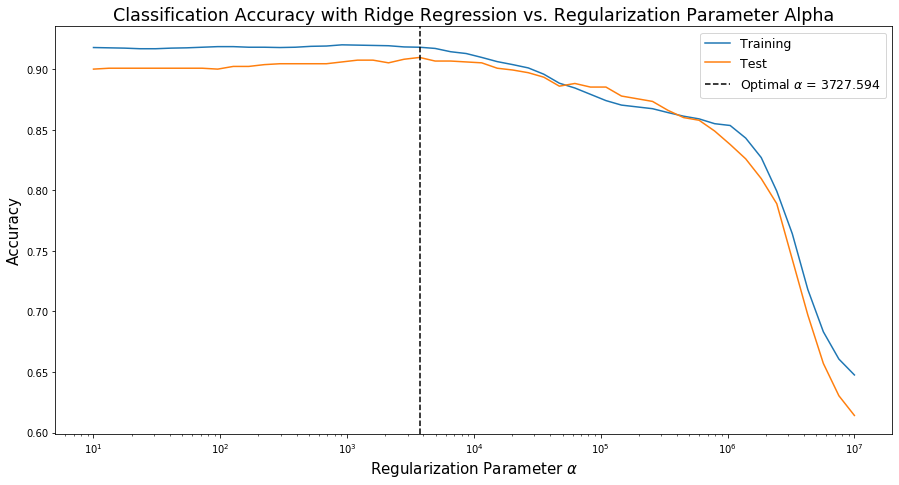

In [ ]:
plt.figure(figsize=(15,7.5))
plt.title('Classification Accuracy with Ridge Regression vs. Regularization Parameter Alpha', fontsize=17.5)
plt.plot(tab_alpha, model_cv_rr.cv_results_['mean_train_score'], label='Training')
plt.plot(tab_alpha, model_cv_rr.cv_results_['mean_test_score'] , label='Test')

plt.xlabel('Regularization Parameter $\\alpha$', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.axvline(cv_best_alpha, label='Optimal $\\alpha$ = %.3f'%cv_best_alpha, linestyle='--', color = 'black')
plt.xscale('log')
plt.legend(loc='best', fontsize=12.5)

#### 1.3.2: Hinge regression

In [ ]:
# Train a classifier based on SVM/Hinge

from sklearn.svm import LinearSVC

# models with L1 and L2
h1_model = LinearSVC(penalty='l1', C=1, dual= False)
h2_model = LinearSVC(penalty='l2', C=1, tol=0.1, max_iter=100000)

# fit the model with training set
h1_model.fit(X_train, y_train)
h2_model.fit(X_train, y_train)

# predict the new y's using test set X values
y_pred_1 = h1_model.predict(X_test)
y_pred_2 = h2_model.predict(X_test)

# Scores of models
score_h1 = h1_model.score(X_test,y_test)
score_h2 = h2_model.score(X_test,y_test)
print("H1 score:", score_h1)
print("H2 score:", score_h2)

H1 score: 0.9235048678720446
H2 score: 0.9248956884561892


In [ ]:
# CV fine-tune the parameters

# creating a KFold object with 5 splits 
folds = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

# Specify range of hyperparameters
tab_C = np.logspace(-4,0,30) #lambda = 1, 10**4, C = 1 / lambda
param_grid = [{'C': tab_C}]


# models with L1 and L2
h1_model = LinearSVC(penalty='l1', C=1, dual= False, max_iter=100000)
h2_model = LinearSVC(penalty='l2', C=1, tol=0.1, max_iter=100000)


# set up GridSearchCV()
model_cv_H1 = GridSearchCV(estimator = h1_model,
                           param_grid = param_grid,
                           cv = folds,
                           return_train_score=True)  
model_cv_H2 = GridSearchCV(estimator = h2_model,
                           param_grid = param_grid,
                           cv = folds,
                           return_train_score=True)        



In [ ]:
model_cv_H1.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             error_score=nan,
             estimator=LinearSVC(C=1, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=100000,
                                 multi_class='ovr', penalty='l1',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': a...
       4.52035366e-03, 6.21016942e-03, 8.53167852e-03, 1.17210230e-02,
       1.61026203e-02, 2.21221629e-02, 3.03919538e-02, 4.17531894e-02,
       5.73615251e-02, 7.88046282e-02, 1.08263673e-01, 1.48735211e-01,
       2.04335972e-01, 2.80721620e-01, 3.85662042e-01, 5.29831691e-01,
       7.27895384e-01, 1.00000000e+00])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
H1_cv_results = pd.DataFrame(model_cv_H1.cv_results_)
H1_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time      param_C  \
0       0.003676      0.000495         0.001069        0.000303       0.0001   
1       0.003266      0.000604         0.000923        0.000296  0.000137382   
2       0.002470      0.000237         0.000581        0.000041  0.000188739   
3       0.002401      0.000140         0.000624        0.000121  0.000259294   
4       0.002409      0.000175         0.000599        0.000064  0.000356225   

                          params  split0_test_score  split1_test_score  \
0                  {'C': 0.0001}           0.496296           0.474074   
1  {'C': 0.00013738237958832623}           0.496296           0.474074   
2  {'C': 0.00018873918221350977}           0.496296           0.474074   
3   {'C': 0.0002592943797404667}           0.811111           0.837037   
4   {'C': 0.0003562247890262444}           0.825926           0.848148   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.444444           0.492593  ...         0.474074        0.019174   
1           0.444444           0.492593  ...         0.474074        0.019174   
2           0.444444           0.492593  ...         0.474074        0.019174   
3           0.792593           0.837037  ...         0.819259        0.016794   
4           0.814815           0.848148  ...         0.836296        0.013538   

   rank_test_score  split0_train_score  split1_train_score  \
0               28            0.500000            0.507426   
1               28            0.500000            0.507426   
2               28            0.500000            0.507426   
3               27            0.819307            0.816832   
4               26            0.824257            0.818069   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.517327            0.501238            0.511139   
1            0.517327            0.501238            0.511139   
2            0.517327            0.501238            0.511139   
3            0.826733            0.814356            0.804455   
4            0.827970            0.816832            0.814356   

   mean_train_score  std_train_score  
0          0.507426         0.006407  
1          0.507426         0.006407  
2          0.507426         0.006407  
3          0.816337         0.007242  
4          0.820297         0.005036  

[5 rows x 21 columns]

In [ ]:
model_cv_H2.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             error_score=nan,
             estimator=LinearSVC(C=1, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=100000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array...
       4.52035366e-03, 6.21016942e-03, 8.53167852e-03, 1.17210230e-02,
       1.61026203e-02, 2.21221629e-02, 3.03919538e-02, 4.17531894e-02,
       5.73615251e-02, 7.88046282e-02, 1.08263673e-01, 1.48735211e-01,
       2.04335972e-01, 2.80721620e-01, 3.85662042e-01, 5.29831691e-01,
       7.27895384e-01, 1.00000000e+00])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
H2_cv_results = pd.DataFrame(model_cv_H2.cv_results_)
H2_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time      param_C  \
0       0.004363      0.000733         0.001376        0.000772       0.0001   
1       0.004093      0.001061         0.001130        0.000336  0.000137382   
2       0.003008      0.000269         0.000612        0.000135  0.000188739   
3       0.002857      0.000166         0.000553        0.000043  0.000259294   
4       0.003294      0.000464         0.000561        0.000082  0.000356225   

                          params  split0_test_score  split1_test_score  \
0                  {'C': 0.0001}           0.885185           0.922222   
1  {'C': 0.00013738237958832623}           0.881481           0.918519   
2  {'C': 0.00018873918221350977}           0.877778           0.922222   
3   {'C': 0.0002592943797404667}           0.881481           0.922222   
4   {'C': 0.0003562247890262444}           0.892593           0.922222   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.885185           0.933333  ...         0.907407        0.019458   
1           0.885185           0.933333  ...         0.905926        0.019821   
2           0.892593           0.937037  ...         0.907407        0.020951   
3           0.896296           0.937037  ...         0.909630        0.019401   
4           0.892593           0.940741  ...         0.910370        0.018651   

   rank_test_score  split0_train_score  split1_train_score  \
0               23            0.918317            0.915842   
1               27            0.918317            0.915842   
2               23            0.922030            0.922030   
3               11            0.924505            0.923267   
4                9            0.929455            0.922030   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.922030            0.905941            0.913366   
1            0.922030            0.909653            0.918317   
2            0.925743            0.909653            0.920792   
3            0.930693            0.912129            0.922030   
4            0.931931            0.914604            0.923267   

   mean_train_score  std_train_score  
0          0.915099         0.005400  
1          0.916832         0.004097  
2          0.920050         0.005457  
3          0.922525         0.005992  
4          0.924257         0.006083  

[5 rows x 21 columns]

In [ ]:
best_score_h1 = model_cv_H1.best_score_
best_C_H1 = model_cv_H1.best_params_
print("The best test score for hinge with L1 loss is {0} corresponding to C {1}".format(best_score_h1, best_C_H1))

The best test score for hinge with L1 loss is 0.9162962962962963 corresponding to C {'C': 0.05736152510448681}


In [ ]:
best_score_h2 = model_cv_H2.best_score_
best_C_H2 = model_cv_H2.best_params_
print("The best test score for hinge with L2 loss is {0} corresponding to C {1}".format(best_score_h2, best_C_H2))

The best test score for hinge with L2 loss is 0.914074074074074 corresponding to C {'C': 0.004520353656360241}


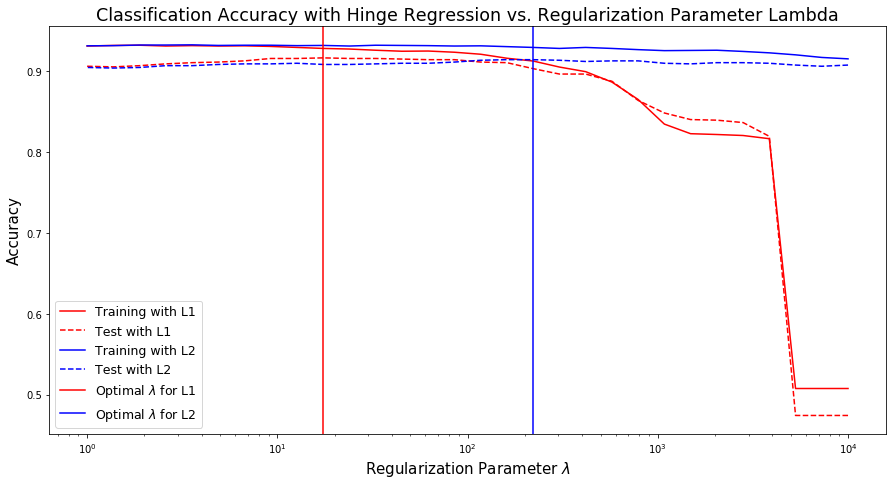

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7.5))

tab_lambda_H = []
for i in tab_C:
  tab_lambda_H.append(1/i)

plt.title('Classification Accuracy with Hinge Regression vs. Regularization Parameter Lambda', fontsize=17.5)
plt.plot(tab_lambda_H, model_cv_H1.cv_results_['mean_train_score'], color='red', label='Training with L1' )
plt.plot(tab_lambda_H, model_cv_H1.cv_results_['mean_test_score'] , color='red', linestyle='--',  label='Test with L1')
plt.plot(tab_lambda_H, model_cv_H2.cv_results_['mean_train_score'] , color='blue', label='Training with L2')
plt.plot(tab_lambda_H, model_cv_H2.cv_results_['mean_test_score']   ,color='blue',linestyle='--', label='Test with L2')

plt.xlabel('Regularization Parameter $\\lambda$', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.axvline(1/0.05736152510448681, label='Optimal $\\lambda$ for L1', color = 'red')
plt.axvline(1/0.004520353656360241, label='Optimal $\\lambda$ for L2', color = 'blue')
plt.xscale('log')
plt.legend(loc='best', fontsize=12.5)

###1.4 Random Forest


In [ ]:
# Fit a Random Forest

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

# Specify range of hyperparameters
tab_n_est = np.logspace(1,4,10,dtype=int) #10, 10**4
param_grid = [{'n_estimators': tab_n_est}]


# set up GridSearchCV()
model_cv_rf = GridSearchCV(model_rf,
                           param_grid = param_grid,
                           scoring= 'accuracy',
                           verbose = 1,
                           cv = folds,
                           return_train_score=True)      

# fit the model
model_cv_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.9min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                             

In [ ]:
cv_best_n = model_cv_rf.cv_results_['params'][model_cv_rf.best_index_] 
best_score_rf = (model_cv_rr.best_estimator_).score(X_test,y_test)

print("The best test score for RR is {0} corresponding to n = {1}".format(best_score_rf, cv_best_n))



The best test score for RR is 0.9109874826147427 corresponding to n = {'n_estimators': 4641}


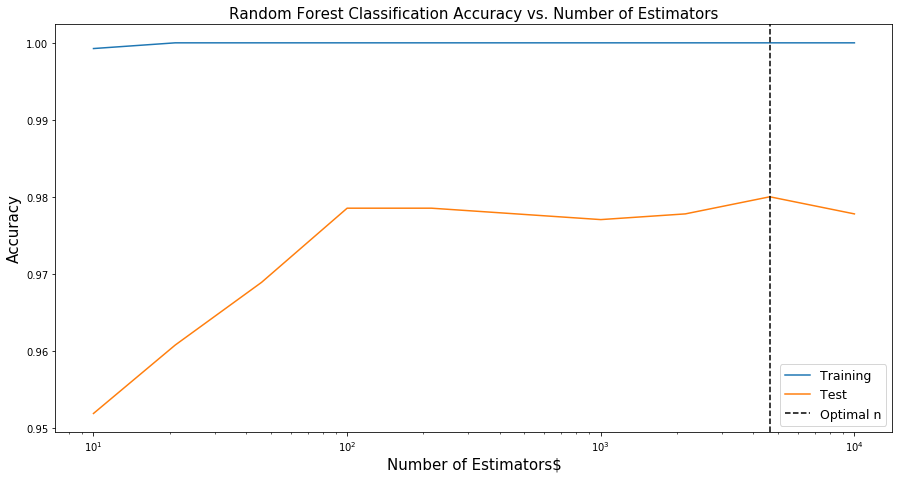

In [ ]:
plt.figure(figsize=(15,7.5))
plt.title('Random Forest Classification Accuracy vs. Number of Estimators', fontsize=15)
plt.plot(tab_n_est, model_cv_rf.cv_results_['mean_train_score'], label='Training')
plt.plot(tab_n_est, model_cv_rf.cv_results_['mean_test_score'] , label='Test')

plt.xlabel('Number of Estimators$', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.axvline(4641, label='Optimal n', linestyle='--', color = 'black')
plt.xscale('log')
plt.legend(loc='best', fontsize=12.5)

###1.5 Random Features:

In [ ]:
# An alternative is to consider the random feature classifier.
# First we transform the vector x containing for each image into another vector u using the following transformation.

d= len(X_raw[0])
#n_RF=4
D = 64

# F is a random Gaussian matrix shaped D×d, where each element is a Gaussian random number of variance 1/d
F = np.random.normal(0,1/d,(D,d))

# F_x = F@X
F_x = np.array([np.dot(F,X_i) for X_i in X_raw])

In [ ]:
# Define sigmoid function
def sigmoid (X):
  sigmoid_X = (1+np.e**(-X))
  return sigmoid_X

In [ ]:
#This transformation maps all the original vector x into seemingly ”randomish” vectors u

import math
sqrt_D = math.sqrt(D)

U = [np.array([1/sqrt_D*sigmoid(Fx_i) for Fx_i in F_x])]

# Process data
U_X_train, U_X_test, U_y_train, U_y_test = train_test_split(U[0],y_bin,test_size = 0.4, random_state=1)


In [ ]:
# Apply logistic regressor, C is the inverse regularization strength
clf_u = LogisticRegression(penalty='l2', max_iter=10000, C=1)

# creating a KFold object with 5 splits 
folds = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

# Specify range of hyperparameters
# Lambda is 1/C
tab_C = np.logspace(2,7,43)
param_grid = [{'C': tab_C}]

# For L2
# set up GridSearchCV()
model_cv_u_L2_i = GridSearchCV(clf_u,
                             param_grid = param_grid,
                             cv = folds,
                             return_train_score=True)      

# fit the model
model_cv_u_L2_i.fit(U_X_train, U_y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             i...
       7.19685673e+04, 9.46652260e+04, 1.24519708e+05, 1.63789371e+05,
       2.15443469e+05, 2.83387671e+05, 3.72759372e+05, 4.90316141e+05,
       6.44946677e+05, 8.48342898e+05, 1.11588399e+06, 1.46779927e+06,
       1.93069773e+06, 2.53958004e+06, 3.34048498e+06, 4.39397056e+06,
       5.

In [ ]:
# Printing the optimal hyperparameters
best_C_U_L2 = model_cv_u_L2_i.best_params_
print("The best test estimator for L2 corresponds to C {0}".format(best_C_U_L2))

best_score_L_U_2 = (model_cv_u_L2_i.best_estimator_).score(U_X_test,U_y_test)
print("The best test score for Logistic Regression with L2 for U is {0} corresponding to lambda {1}".format(best_score_L_U_2, best_C_U_L2))

The best test estimator for L2 corresponds to C {'C': 299.357729472049}
The best test score for Logistic Regression with L2 for U is 0.9221140472878998 corresponding to lambda {'C': 299.357729472049}


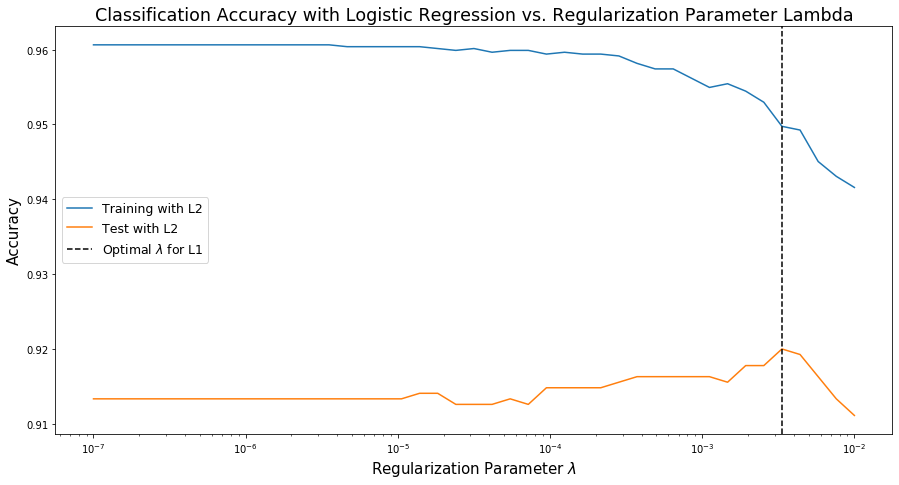

In [ ]:
plt.figure(figsize=(15,7.5))

tab_lambda_L = []
for i in tab_C:
  tab_lambda_L.append(1/i)

plt.title('Classification Accuracy with Logistic Regression vs. Regularization Parameter Lambda', fontsize=17.5)
plt.plot(tab_lambda_L, model_cv_u_L2_i.cv_results_['mean_train_score'] , label='Training with L2')
plt.plot(tab_lambda_L, model_cv_u_L2_i.cv_results_['mean_test_score']   ,label='Test with L2')

plt.xlabel('Regularization Parameter $\\lambda$', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.axvline(1/299.357729472049, label='Optimal $\\lambda$ for L1', linestyle='--', color = 'black')
plt.xscale('log')
plt.legend(loc='best', fontsize=12.5)

In [ ]:
D_i = [64, 128, 256, 512, 1024]
scores_U_train = []
scores_U_test = []
best_C_U = []

for D in D_i:
  F = np.random.normal(0,1/d,(D,d))

  F_x = np.array([F@X_i for X_i in X_raw])

  U = [np.array([1/math.sqrt(D)*sigmoid(Fx_i) for Fx_i in F_x])]

  # Process data
  U_X_train, U_X_test, U_y_train, U_y_test = train_test_split(U[0],y_bin,test_size = 0.4, random_state=1)
  # Apply logistic regressor, C is the inverse regularization strength
  clf_u = LogisticRegression(penalty='l2', max_iter=10000, C=1)

  # creating a KFold object with 5 splits 
  folds = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

  # Specify range of hyperparameters
  # Lambda is 1/C
  tab_C = np.logspace(2,7,43)
  param_grid = [{'C': tab_C}]

  # For L2
  # set up GridSearchCV()
  model_cv_u_L2 = GridSearchCV(clf_u,
                             param_grid = param_grid,
                             cv = folds,
                             return_train_score=True)      

  # fit the model
  model_cv_u_L2.fit(U_X_train, U_y_train)

  scores_U_train.append(model_cv_u_L2.cv_results_['mean_train_score'])
  scores_U_test.append(model_cv_u_L2.cv_results_['mean_test_score'])
  best_C_U.append(model_cv_u_L2.best_estimator_) 
                       


In [ ]:
best_C_U

[LogisticRegression(C=227.58459260747887, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=10000, multi_class='auto', n_jobs=None,
                    penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                    verbose=0, warm_start=False),
 LogisticRegression(C=681.2920690579608, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=10000, multi_class='auto', n_jobs=None,
                    penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                    verbose=0, warm_start=False),
 LogisticRegression(C=131.53690504363763, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=10000, multi_class='auto', n_jobs=None,
                    penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
    

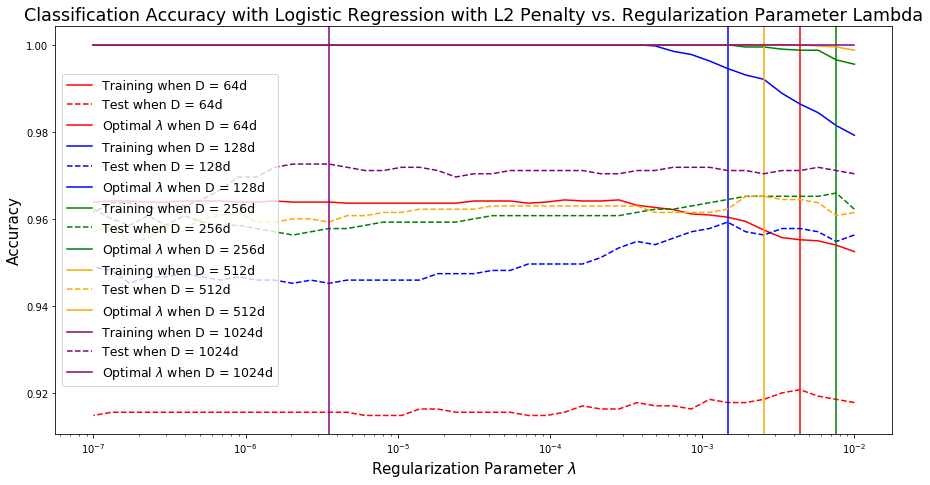

In [ ]:
tab_lambda_L = []
for i in tab_C:
  tab_lambda_L.append(1/i)

lambda_opt = [1/227.58459260747887, 1/681.2920690579608, 1/131.53690504363763, 1/393.76589235643877, 1/283387.6712454429]

plt.figure(figsize=(15,7.5))
plt.title('Classification Accuracy with Logistic Regression with L2 Penalty vs. Regularization Parameter Lambda', fontsize=17.5)
plt.xlabel('Regularization Parameter $\\lambda$', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xscale('log')
color = ['red', 'blue', 'green', 'orange', 'purple']

for j in range (0, len(D_i)):
  D = D_i[j]
  scalar = int(D/d)
  plt.plot(tab_lambda_L, scores_U_train[j] , label='Training when D = {}d'.format(scalar), color = color[j])
  plt.plot(tab_lambda_L, scores_U_test[j]  ,label='Test when D = {}d'.format(scalar), color = color[j], linestyle='--')

  plt.axvline(lambda_opt[j], label='Optimal $\\lambda$ when D = {}d'.format(scalar), color = color[j])

plt.legend(loc='best', fontsize=12.5)

As it can be observed with this graph, accuracy increases as D increases.

##2 Statistical Learning with Nearest-Neighbors

###2.1

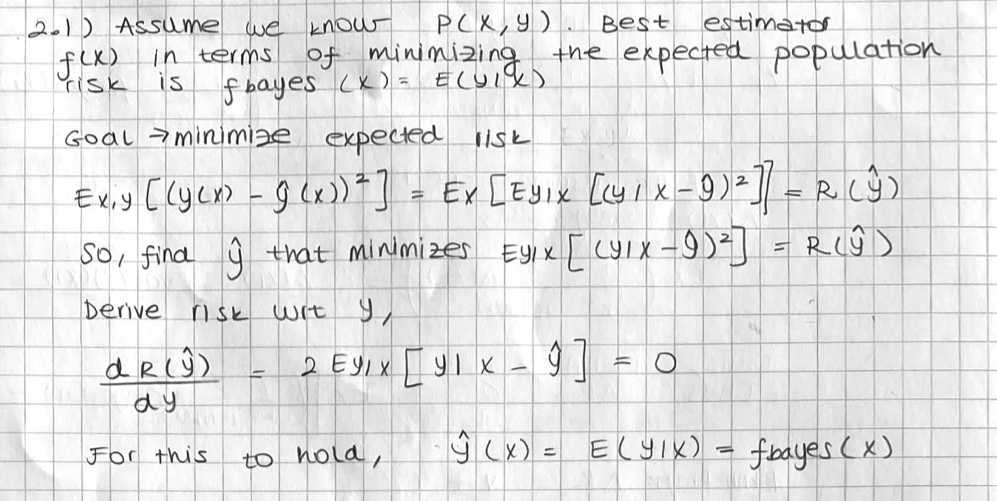

###2.2


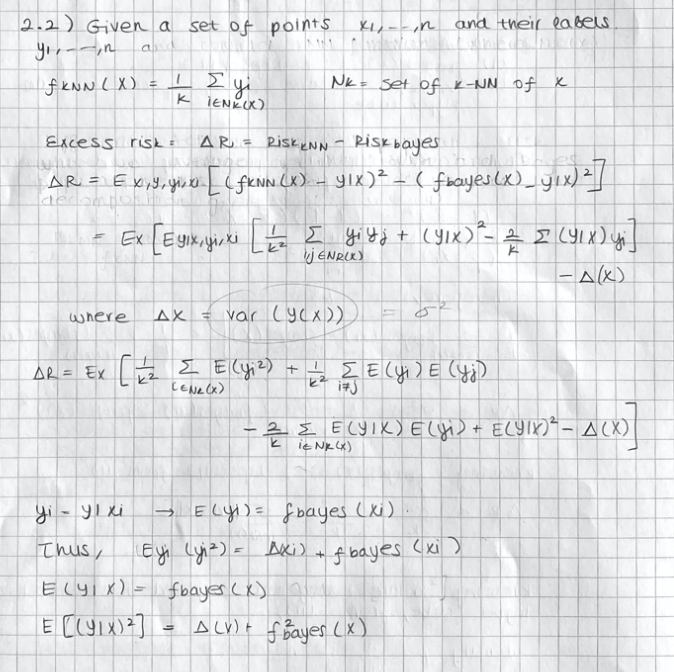

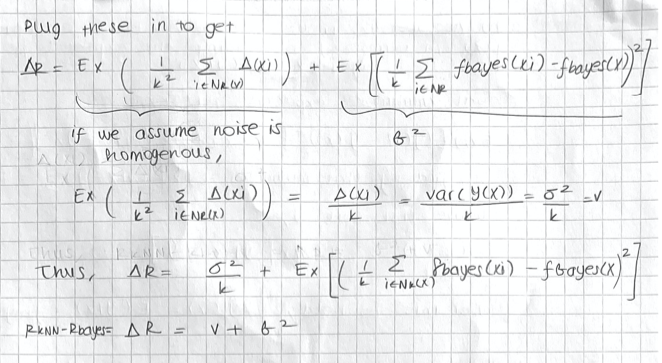

###2.3

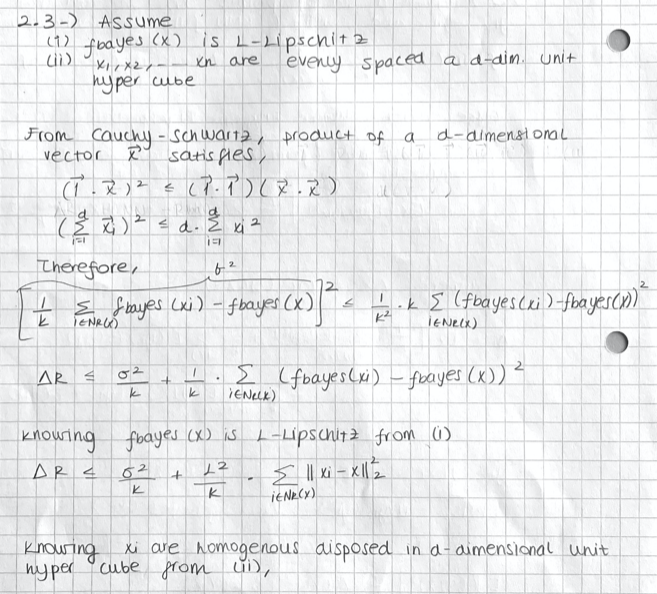

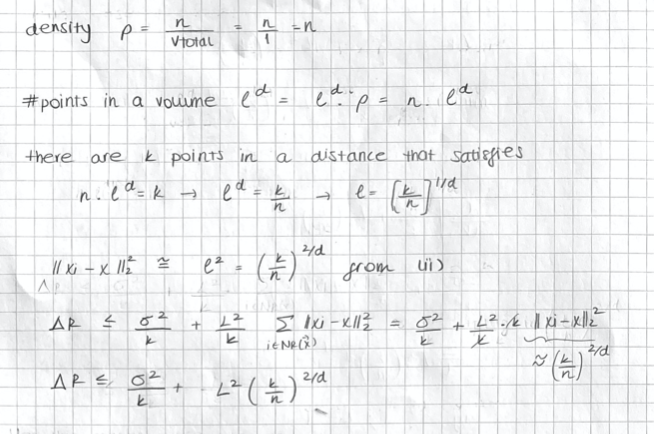

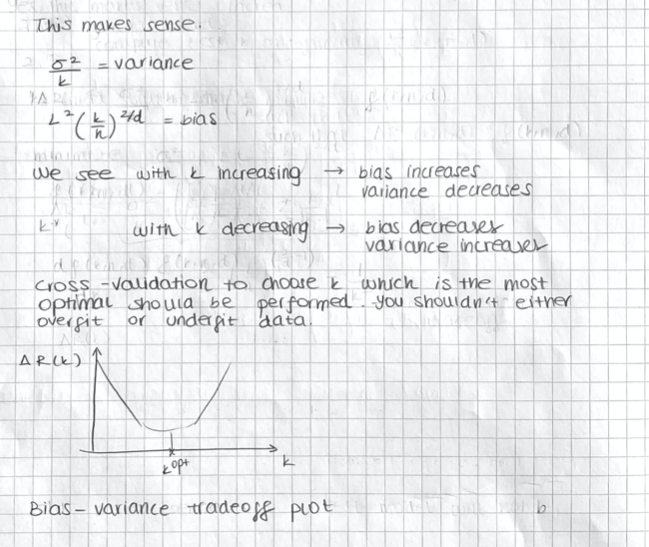

### 2.4

To get an idea of what the terms in the bound look like and what the best k might be, plot the individual terms in the bound for the excess risk and the bound itself for n = 100 and d = 1 as a function of k to visualize the trade-off. Find the value of k that minimizes the excess risk. Repeat for different values of n and d.

Text(0, 0.5, '$\\Delta$ R')

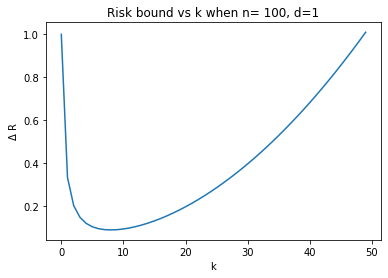

In [ ]:
def risk_bound(k,n,d):
  bias = 1/k
  variance = (k/n)**(2/d)
  return bias+variance

n = 100
d = 1
tab_k = np.linspace(1,100) 

r_bounds = []
for k_i in tab_k:
  r_i = risk_bound(k_i,n,d)
  r_bounds.append(r_i)

plt.plot(r_bounds)
plt.title('Risk bound vs k when n= 100, d=1')
plt.xlabel('k')
plt.ylabel('$\Delta$ R')

In [ ]:
k_optimal = np.argmin(r_bounds)
print('Optimal K for KNN = ',k_optimal, 'when d= 1, n=100')

Optimal K for KNN =  8 when d= 1, n=100


When d = 100  and n= 100 the optimal K for KNN is  25
When d = 1000  and n= 100 the optimal K for KNN is  49
When d = 10000  and n= 100 the optimal K for KNN is  49
When d = 100  and n= 1000 the optimal K for KNN is  26
When d = 1000  and n= 1000 the optimal K for KNN is  49
When d = 10000  and n= 1000 the optimal K for KNN is  49
When d = 100  and n= 10000 the optimal K for KNN is  27
When d = 1000  and n= 10000 the optimal K for KNN is  49
When d = 10000  and n= 10000 the optimal K for KNN is  49


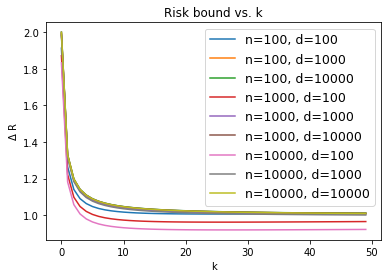

In [ ]:
n_tab = [100, 1000, 10000]
d_tab = [100, 1000, 10000]
k_tab = np.linspace(1,100) 

for n_i in n_tab:
  for d_i in d_tab:
    r_bounds = []
    for k_i in tab_k:
      r_i = risk_bound(k_i,n_i,d_i)
      r_bounds.append(r_i)


    plt.plot(r_bounds, label='n=%i, d={}'.format(d_i) %n_i)
    plt.title('Risk bound vs. k')
    plt.xlabel('k')
    plt.ylabel('$\Delta$ R')
    plt.legend(loc='best', fontsize=12.5)
    k_optimal = np.argmin(r_bounds)
    print('When d =',d_i,' and n=',n_i,'the optimal K for KNN is ',k_optimal)



###2.5

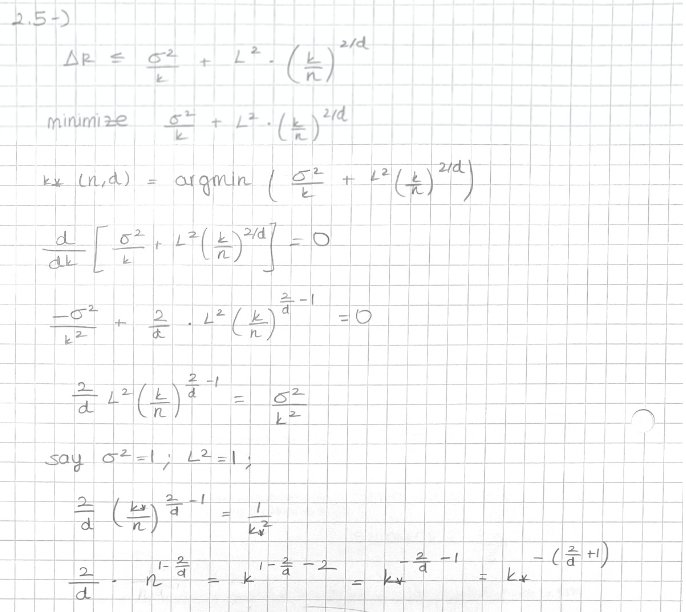

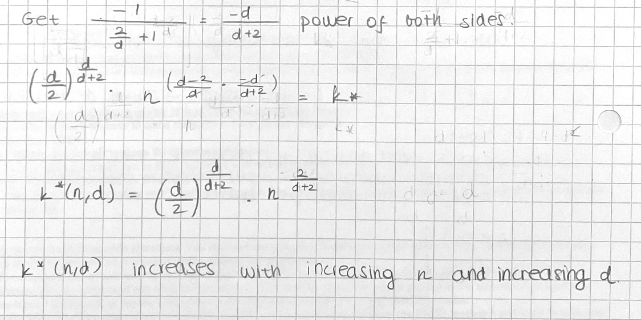

###2.6

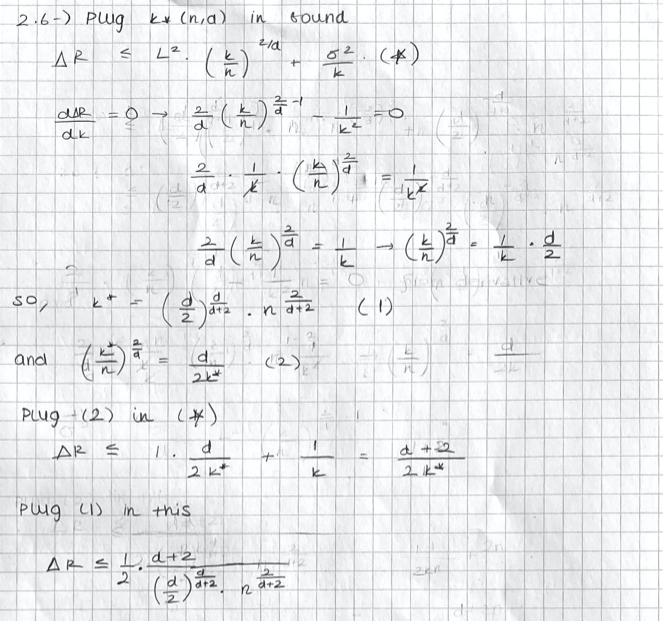

###2.7

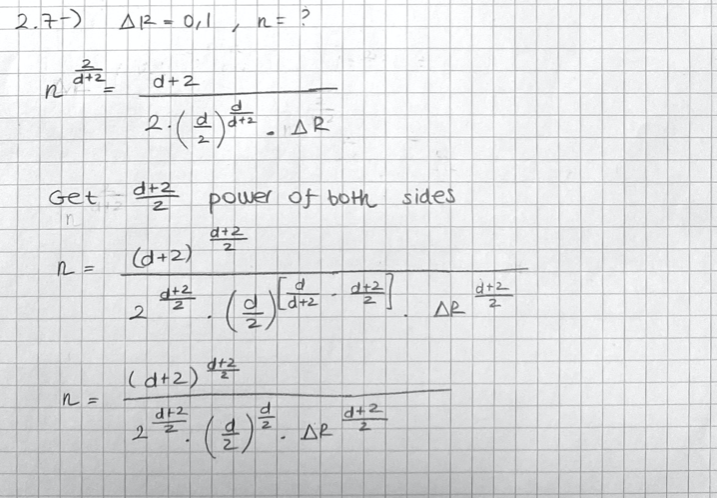

To understand and get an intuition on the meaning of this result, the number of samples n required to achieve excess squared risk of 0.1 as a function of the dimension d is plotted. The plot is presented below and it is concerning that one requires a lot of samples to achieve a bound of 0.1 on excess squared risk and the number of samples needed is growing very rapidly with increasing d.

Text(0.5, 0, 'd')

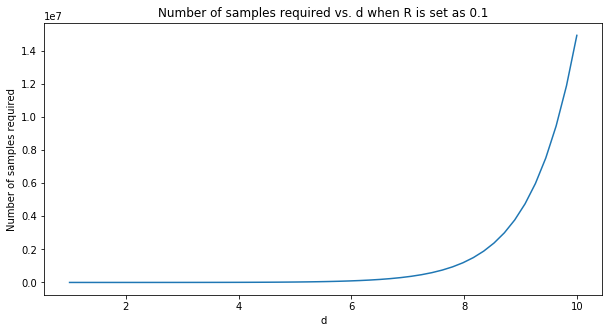

In [ ]:
def calculate_no_req(d):
  req = (d+2)**((d+2)/2) / ( (0.5*d)**(0.5*d) *(0.2)**((d+2)*0.5))
  return req

d_tab = np.linspace(1,10) 
samples_req = []
for d_i in d_tab:
  samples_req.append(calculate_no_req(d_i))

plt.figure(figsize=(10,5))
plt.plot(d_tab, samples_req)
plt.title('Number of samples required vs. d when R is set as 0.1')
plt.ylabel('Number of samples required')
plt.xlabel('d')